In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from knn_classifier import KNNClassifier
import time

# Satasets to evaluate
datasets = {
    "Iris": load_iris(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer(),
    "Digits": load_digits()
}

K = 5  # number of nearest neighbors

results = []

# Evaluation loop through all sets
for name, data in datasets.items():
    print(f"\nDataset: {name}")

    X = data.data
    y = data.target

    # Train - test split (70 / 30)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=True
    )

    # Custom KNN implementation
    start_time = time.perf_counter()
    knn = KNNClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    train_time_knn = time.perf_counter() - start_time

    start_time = time.perf_counter()
    preds = knn.predict(X_test)
    predict_time_knn = time.perf_counter() - start_time

    start_time = time.perf_counter()
    acc = knn.score(X_test, y_test)
    score_time_knn = time.perf_counter() - start_time

    # KNN from Sklearn
    start_time = time.perf_counter()
    sk_knn = KNeighborsClassifier(n_neighbors=K, metric="euclidean")
    sk_knn.fit(X_train, y_train)
    train_time_sklearn = time.perf_counter() - start_time

    start_time = time.perf_counter()
    sk_preds = sk_knn.predict(X_test)
    predict_time_sklearn = time.perf_counter() - start_time

    start_time = time.perf_counter()
    sk_acc = sk_knn.score(X_test, y_test)
    score_time_sklearn = time.perf_counter() - start_time
    
    identical = np.array_equal(preds, sk_preds)
    diff_count = np.sum(preds != sk_preds)

    label_wdth = 30
    print(f"{"Custom KNN accuracy":<{label_wdth}} : {acc:.4f}")
    print(f"{"Sklearn KNN accuracy":<{label_wdth}} : {sk_acc:.4f}")
    print(f"{"Are predictions identical?":<{label_wdth}} : {identical}")
    print(f"{"Number of Differences":<{label_wdth}} : {diff_count}")

    print(f"\n{"Custom KNN train time (s)":<{label_wdth}} : {train_time_knn:.6f}")
    print(f"{"Custom KNN predict time (s)":<{label_wdth}} : {predict_time_knn:.6f}")
    print(f"{"Custom KNN score time (s)":<{label_wdth}} : {score_time_knn:.6f}")

    print(f"\n{"Sklearn KNN train time (s)":<{label_wdth}} : {train_time_sklearn:.6f}")
    print(f"{"Sklearn KNN predict time (s)":<{label_wdth}} : {predict_time_sklearn:.6f}")
    print(f"{"Sklearn KNN score time (s)":<{label_wdth}} : {score_time_sklearn:.6f}")

    results.append([
        name, 
        acc, 
        sk_acc, 
        identical, 
        diff_count,
        train_time_knn,
        predict_time_knn,
        score_time_knn,
        train_time_sklearn,
        predict_time_sklearn,
        score_time_sklearn,
    ])



Dataset: Iris
Custom KNN accuracy            : 1.0000
Sklearn KNN accuracy           : 1.0000
Are predictions identical?     : True
Number of Differences          : 0

Custom KNN train time (s)      : 0.000013
Custom KNN predict time (s)    : 0.029625
Custom KNN score time (s)      : 0.022080

Sklearn KNN train time (s)     : 0.000549
Sklearn KNN predict time (s)   : 0.002167
Sklearn KNN score time (s)     : 0.002236

Dataset: Wine
Custom KNN accuracy            : 0.7407
Sklearn KNN accuracy           : 0.7407
Are predictions identical?     : True
Number of Differences          : 0

Custom KNN train time (s)      : 0.000007
Custom KNN predict time (s)    : 0.031320
Custom KNN score time (s)      : 0.031420

Sklearn KNN train time (s)     : 0.000526
Sklearn KNN predict time (s)   : 0.002328
Sklearn KNN score time (s)     : 0.002519

Dataset: Breast Cancer
Custom KNN accuracy            : 0.9591
Sklearn KNN accuracy           : 0.9591
Are predictions identical?     : True
Number of Diff

In [19]:
# Summary table
df_results = pd.DataFrame(
    results,
    columns=[
        "Dataset",
        "Custom KNN Accuracy",
        "Sklearn KNN Accuracy",
        "Are predictions identical?",
        "Num. of Differences",
        "Custom KNN Train Time (s)",
        "Custom KNN Predict Time (s)",
        "Custom KNN Score Time (s)",
        "Sklearn KNN Train Time (s)",
        "Sklearn KNN Predict Time (s)",
        "Sklearn KNN Score Time (s)"
    ]
)

df_results

,Dataset,Custom KNN Accuracy,Sklearn KNN Accuracy,Are predictions identical?,Num. of Differences,Custom KNN Train Time (s),Custom KNN Predict Time (s),Custom KNN Score Time (s),Sklearn KNN Train Time (s),Sklearn KNN Predict Time (s),Sklearn KNN Score Time (s)
0,Iris,1.000000,1.000000,True,0,0.000013,0.029625,0.022080,0.000549,0.002167,0.002236
1,Wine,0.740741,0.740741,True,0,0.000007,0.031320,0.031420,0.000526,0.002328,0.002519
2,Breast Cancer,0.959064,0.959064,True,0,0.000012,0.316538,0.318313,0.000745,0.007510,0.007121
3,Digits,0.992593,0.992593,True,0,0.000056,3.159961,3.156017,0.000549,0.020851,0.021012


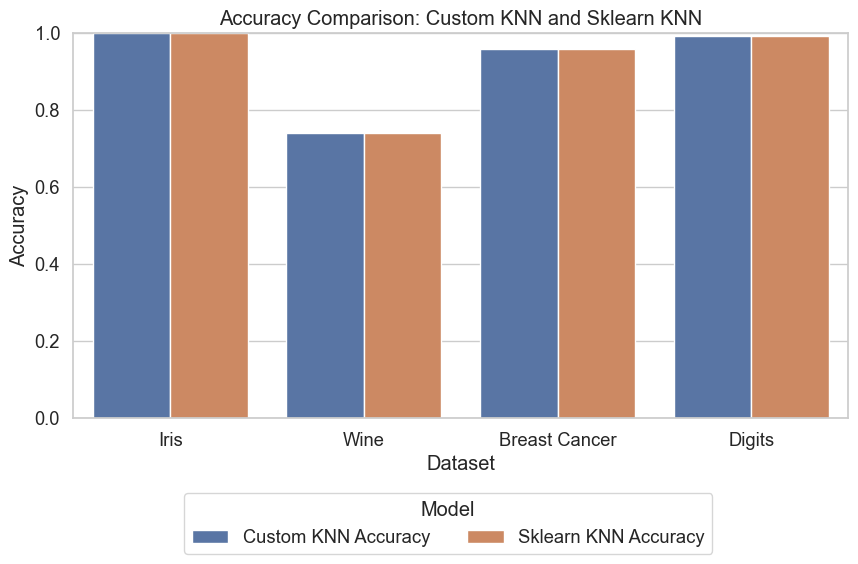

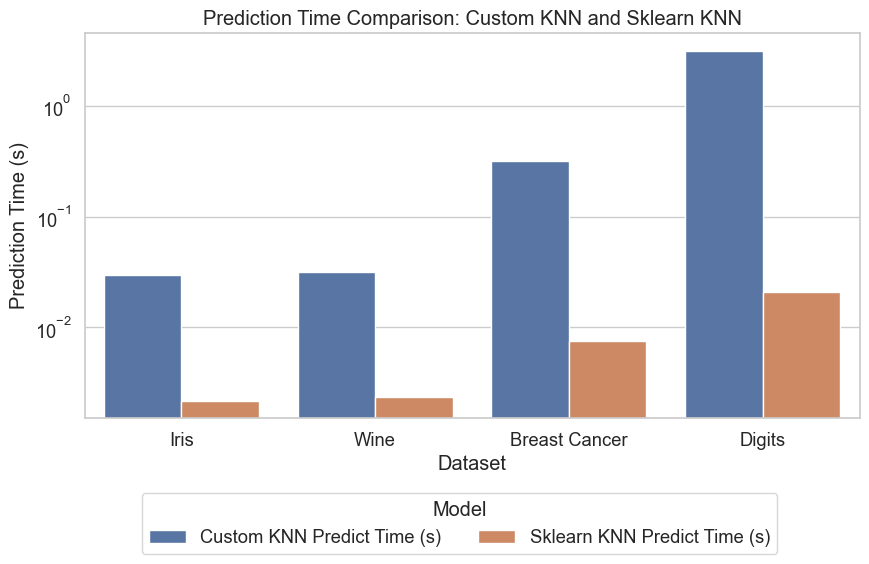

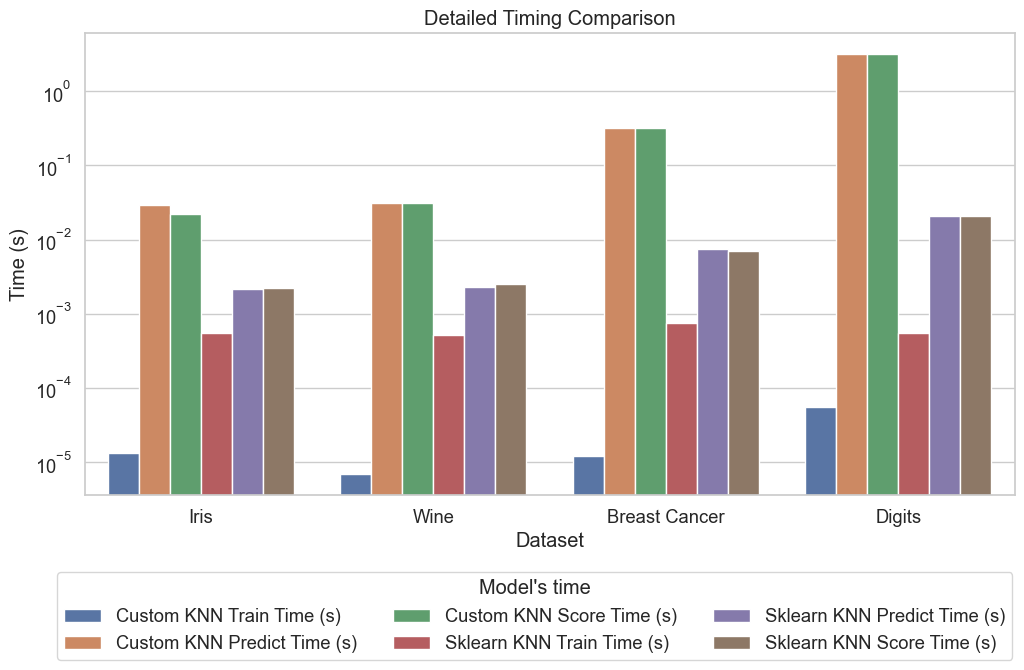

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)


# Acc comparison
plt.figure(figsize=(10, 5))
df_plot = df_results.melt(
    id_vars="Dataset",
    value_vars=["Custom KNN Accuracy", "Sklearn KNN Accuracy"],
    var_name="Model",
    value_name="Accuracy"
)

ax = sns.barplot(data=df_plot, x="Dataset", y="Accuracy", hue="Model")
plt.title("Accuracy Comparison: Custom KNN and Sklearn KNN")
plt.ylim(0, 1)
handles, labels = ax.get_legend_handles_labels()
plt.gcf().legend(
    handles, labels,
    loc="outside lower center", 
    bbox_to_anchor=(0.5, -0.18),
    ncol=3,
    frameon=True,
    title="Model"
)
plt.show()

# Prediction times comparison
plt.figure(figsize=(10, 5))
df_plot_time = df_results.melt(
    id_vars="Dataset",
    value_vars=["Custom KNN Predict Time (s)", "Sklearn KNN Predict Time (s)"],
    var_name="Model",
    value_name="Prediction Time (s)"
)

ax = sns.barplot(data=df_plot_time, x="Dataset", y="Prediction Time (s)", hue="Model")
plt.title("Prediction Time Comparison: Custom KNN and Sklearn KNN")
plt.yscale("log")
handles, labels = ax.get_legend_handles_labels()
plt.gcf().legend(
    handles, labels,
    loc="outside lower center", 
    bbox_to_anchor=(0.5, -0.18),
    ncol=3,
    frameon=True,
    title="Model"
)
plt.show()


# All times summed up comparison
plt.figure(figsize=(12, 6))
df_time_all = df_results.melt(
    id_vars="Dataset",
    value_vars=[
        "Custom KNN Train Time (s)",
        "Custom KNN Predict Time (s)",
        "Custom KNN Score Time (s)",
        "Sklearn KNN Train Time (s)",
        "Sklearn KNN Predict Time (s)",
        "Sklearn KNN Score Time (s)"
    ],
    var_name="Operation",
    value_name="Time (s)"
)

ax = sns.barplot(data=df_time_all, x="Dataset", y="Time (s)", hue="Operation")
plt.title("Detailed Timing Comparison")
plt.yscale("log")
handles, labels = ax.get_legend_handles_labels()
plt.gcf().legend(
    handles, labels,
    loc="outside lower center", 
    bbox_to_anchor=(0.5, -0.18),
    ncol=3,
    frameon=True,
    title="Model's time"
)
plt.show()